In [4]:
import pandas as pd
import geopandas as gpd
import subprocess

from shapely.geometry import Point

In [5]:
def get_observation(description : str, tix : int):
    ''' Obtain selected observation geometry and datetime
    '''

    if description not in ['Maria2019', 'River2021', 'Bridge2021']:
        raise ValueError(f'description {description} not present in db')
    
    df = pd.read_csv('/mnt/c/Users/tolk1/Dropbox/SDSC/WiFire/farsite-devAPI/data/dftable_06032023.csv')
    
    dfrow = df[df['description'] == description].sort_values('datetime').iloc[tix]
    dfgeom = gpd.read_file(dfrow['filepath']).set_crs(epsg=5070).to_crs(3857)['geometry'][0]
    dfdt = dfrow['datetime']
    
    return dfgeom, dfdt

In [6]:
ninja_wx = pd.read_csv('/mnt/c/Users/tolk1/Dropbox/SDSC/WiFire/data/WXSTATIONS-2024-03-14-1712-maria_250/ATNC1-2024-03-14_1712-17.csv')
wx_se045 = pd.read_csv('/mnt/c/Users/tolk1/Dropbox/SDSC/WiFire/data/WX Station Maria/WindNinjaWX/SE045_2019-11-02.csv')

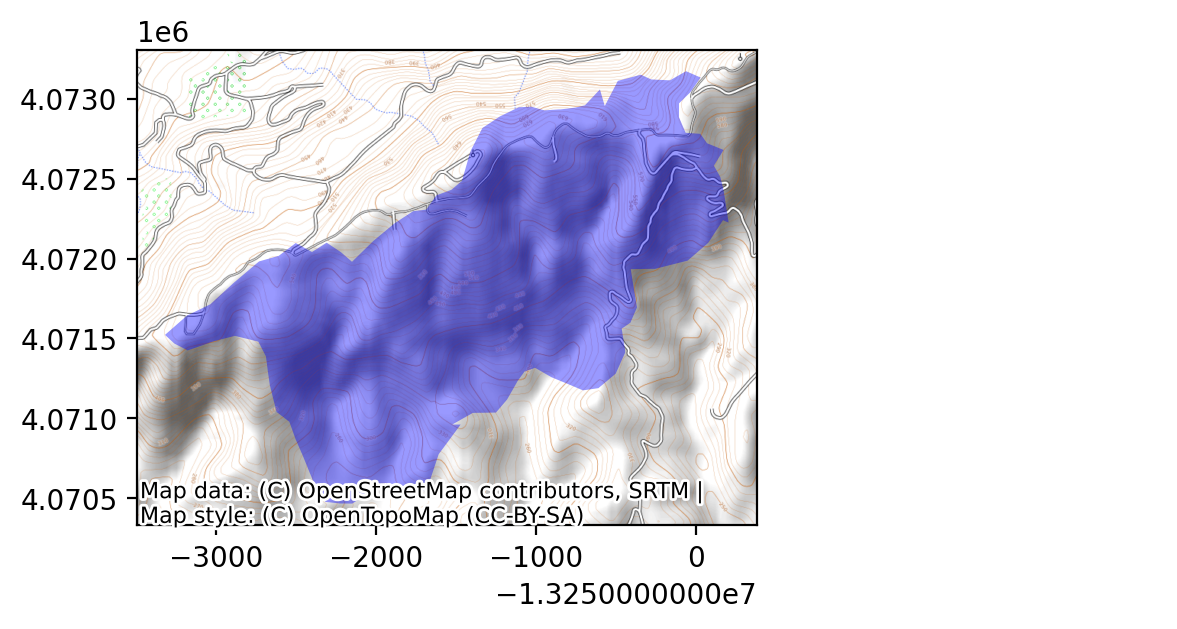

In [7]:
import contextily as ctx
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=200)
gpd.GeoSeries(get_observation('Maria2019', 0)[0]).plot(ax=ax, color=(0,0,1,0.4))

ctx.add_basemap(ax=ax, source=ctx.providers.OpenTopoMap)

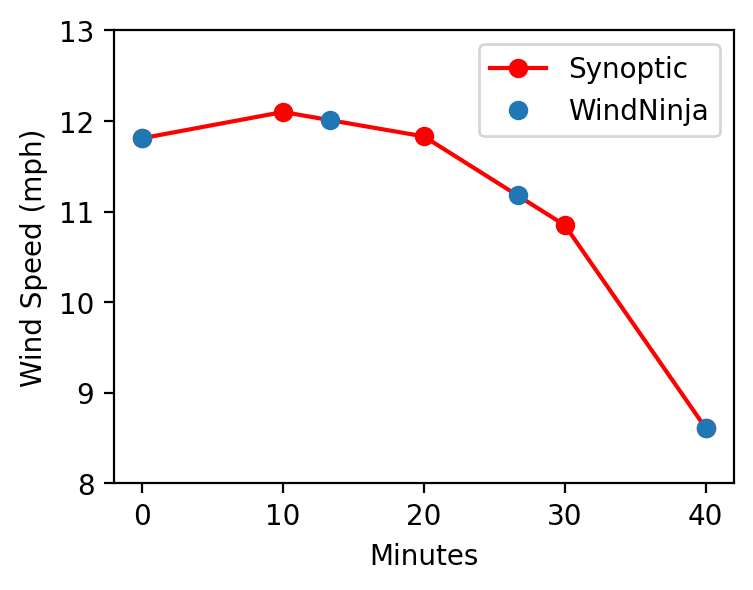

In [8]:
import numpy as np
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(4,3), dpi=200)

ninja_mins = np.array([0, 13 + 2/6, 26 + 4/6, 40])
ninja_speed = np.array([11.81, 12.01, 11.18, 8.61])
synoptic_mins = np.array([0,10,20,30,40])
synoptic_speed = np.array([11.81, 12.10, 11.83, 10.85, 8.61])

ax.plot(synoptic_mins, synoptic_speed, 'r-o', label='Synoptic')
ax.plot(ninja_mins, ninja_speed, 'o', label='WindNinja')

ax.set_xlabel('Minutes')
ax.set_ylabel('Wind Speed (mph)')
ax.set_ylim(8,13)
ax.legend()

In [9]:
ninja_shp = gpd.read_file('/mnt/c/Users/tolk1/Dropbox/SDSC/WiFire/farsite-devAPI/windninja/all_results/maria_elevation_tif_point_11-01-2019_0000_500m.shp')
ninja_shp = ninja_shp.to_crs(epsg=3857)

In [10]:
geom, dt = get_observation('Maria2019', 0)
points = gpd.GeoSeries([Point(x,y) for x,y in zip(geom.exterior.coords.xy[0], geom.exterior.coords.xy[1])])

for point in points:
    mindist_row = ninja_shp.iloc[ninja_shp.distance(point).argmin()]

# ninja_shp.distance(points.iloc[0]).min()

In [11]:
maria_shp = gpd.read_file('/mnt/c/Users/tolk1/Dropbox/SDSC/WiFire/farsite-devAPI/data/maria-wgs84/maria-wgs84.shp').to_crs(epsg=32611)

In [13]:
import geopandas as gpd
from matplotlib import pyplot as plt

In [14]:
gdf = gpd.read_file('../tomas/Testing/maria_test/WindFields/Maria2019_point_11-01-2019_0307_500m.shp')

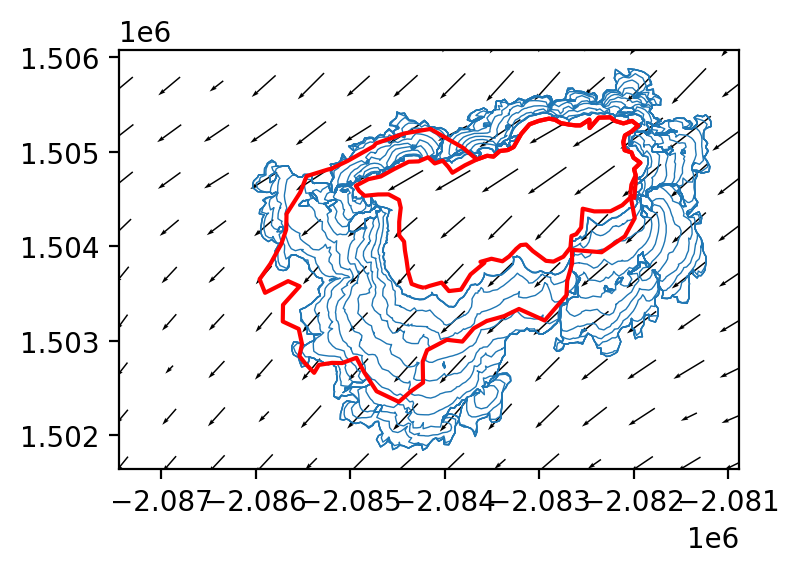

In [39]:
fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=200)
farsite_results = gpd.read_file('../tomas/Testing/maria_test/OutShape_Maria2019.shp')
farsite_results.plot(ax=ax, label='sim', lw=0.5)

gpd.read_file('../inputs/maria_ignite/maria_21231.shp')['geometry'].exterior.plot(ax=ax, color='red')
gpd.read_file('../inputs/maria_ignite/maria_21232.shp')['geometry'].exterior.plot(ax=ax, color='red')
# gpd.read_file('../inputs/maria_ignite/maria_21234.shp')['geometry'].exterior.plot(ax=ax, color='red')

# gdf.plot(ax=ax)

ax.set_xlim((-2087445.3506529718, -2080883.0976794504))
ax.set_ylim((1501641.0622001241, 1506082.8856210401))

dx = gdf['speed']*np.cos(gdf['QGIS_dir']*np.pi/180)
dy = gdf['speed']*np.sin(gdf['QGIS_dir']*np.pi/180)
x = gdf['geometry'].x
y = gdf['geometry'].y

ax.quiver(x, y, dx, dy, pivot='mid', scale=100)

# dx = dx.values.reshape((len(y), len(x)))
# dy = dy.values.reshape((len(y), len(x)))
# ax.streamplot(x, y, dx, dy, linewidth=0.3, arrowsize=0.3, density=2, broken_streamlines=False)

NameError: name 'plot_geometry' is not defined

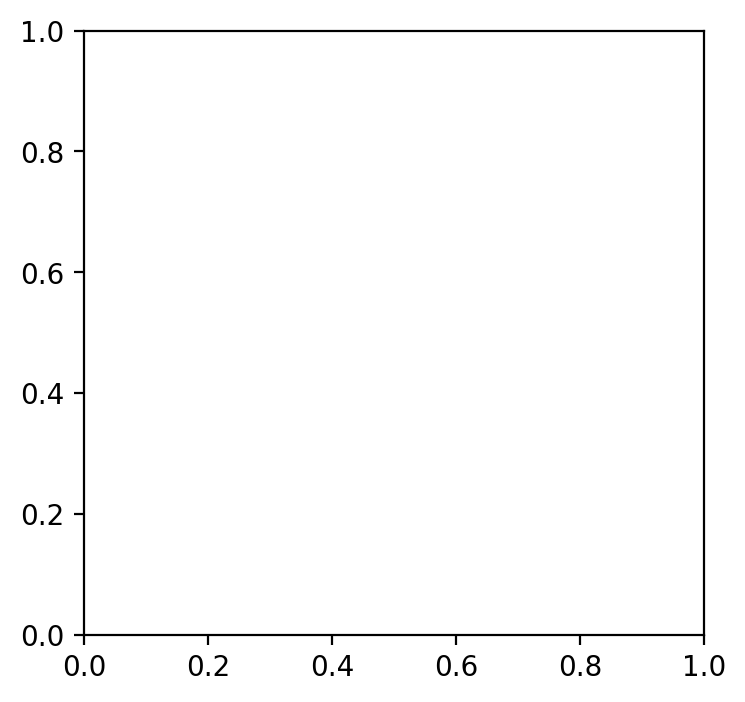

In [36]:
def plot_geometry(geom, ax = None, plot_alix = None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize=(4,4))
    
    if isinstance(geom, MultiPolygon):
        for g in geom.geoms:
            x,y = g.exterior.coords.xy
            ax.plot(x,y, **kwargs)
            
        if plot_alix is not None:
            print('Cannot plot plot_alix for MultiPolygon...')
    else:
        x,y = geom.exterior.coords.xy
        ax.plot(x,y, **kwargs)
        
        if plot_alix is not None:
            ax.plot(x[plot_alix], y[plot_alix], 'ro')
        
        
    ax.set_aspect('equal')
    


fig ,ax = plt.subplots(1,1, figsize=(4,4), dpi=200)
plot_geometry

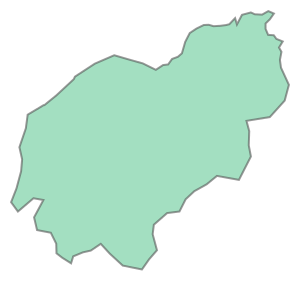

In [34]:
get_observation('Maria2019', 1)[0]

In [83]:
import matplotlib

In [1]:
!pip install matplotlib --upgrade
!pip install geopandas --upgrade

  Using cached matplotlib-3.8.4-cp39-cp39-win_amd64.whl (7.7 MB)
